# Text Detection with EasyOCR

This notebook will demonstrate how to use `EasyOCR` to detect text in an image. EasyOCR is a Python library that can perform Optical Character Recognition (OCR) with a few lines of code.

## Installation

First, we need to install the `EasyOCR` library. You can install it using pip.

In [ ]:
# Install EasyOCR
!pip install easyocr

## Initialize EasyOCR Reader

The `EasyOCR` library supports multiple languages. Here, we will initialize the reader with English and Thai.

**Note:** This language input is only used for the text *recognition* process but not for the text *detection* process.

In [ ]:
from easyocr import Reader

# Initialize the EasyOCR reader
reader = Reader(['en', 'th'])

## Load and Display the Image

We will load the our document image and display it using jupyter notebook built-in `display` function.

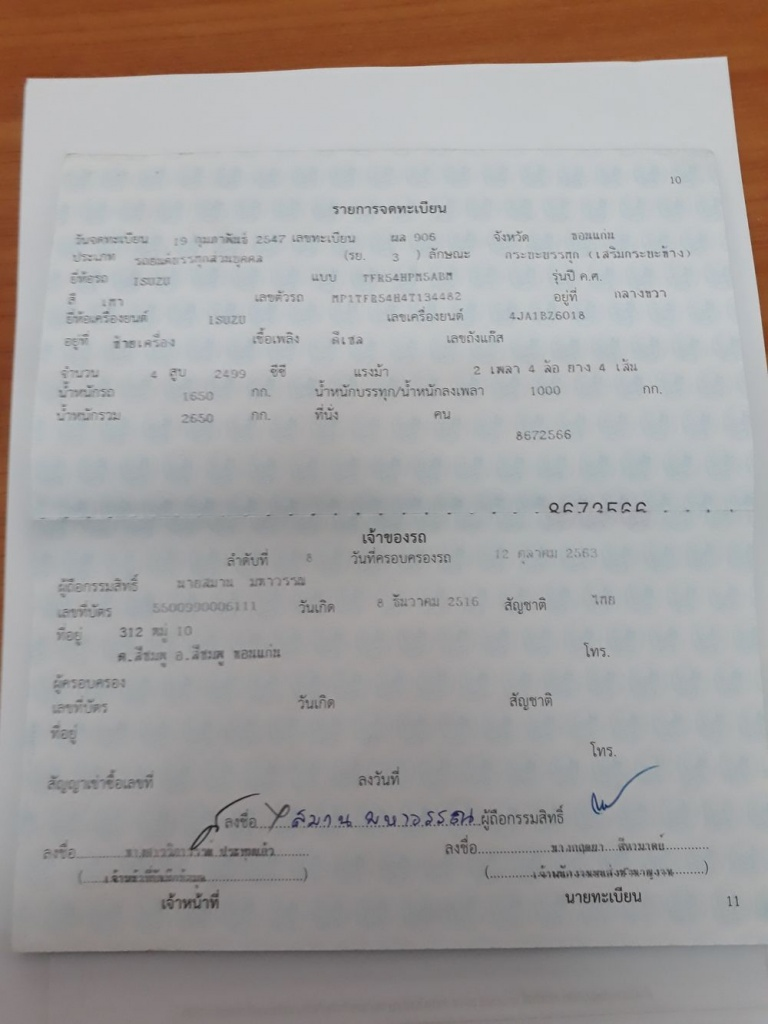

In [3]:
from PIL import Image

# Load the image from a path
image_path = "path/to/image.jpg"
image = Image.open(image_path)

display(image)

## Perform Text Detection

We will use the `readtext` method from the `EasyOCR` reader to detect text in the image. This method returns a list of results, where each result contains the bounding box, the detected text, and the confidence score.

```py
[[[x1, y1], [x2, y2], [x3, y3], [x4, y4]], 'Detected Text', 0.99]
```

In [4]:
# Perform text detection
results = reader.readtext(image_path)

# Print first result just to see the output
bbox, text, confidence_score = results[0]

print(f'Text: {text}')
print(f'Confidence score: {confidence_score}')
print(f'Bounding box: {bbox}')

Text: รายการจดระเบียน
Confidence score: 0.5688784671955119
Bounding box: [[np.int32(331), np.int32(199)], [np.int32(449), np.int32(199)], [np.int32(449), np.int32(217)], [np.int32(331), np.int32(217)]]


## Draw Bounding Boxes and Display the Image with Predictions

We will draw the bounding boxes around the detected text and display the image with the text predictions.

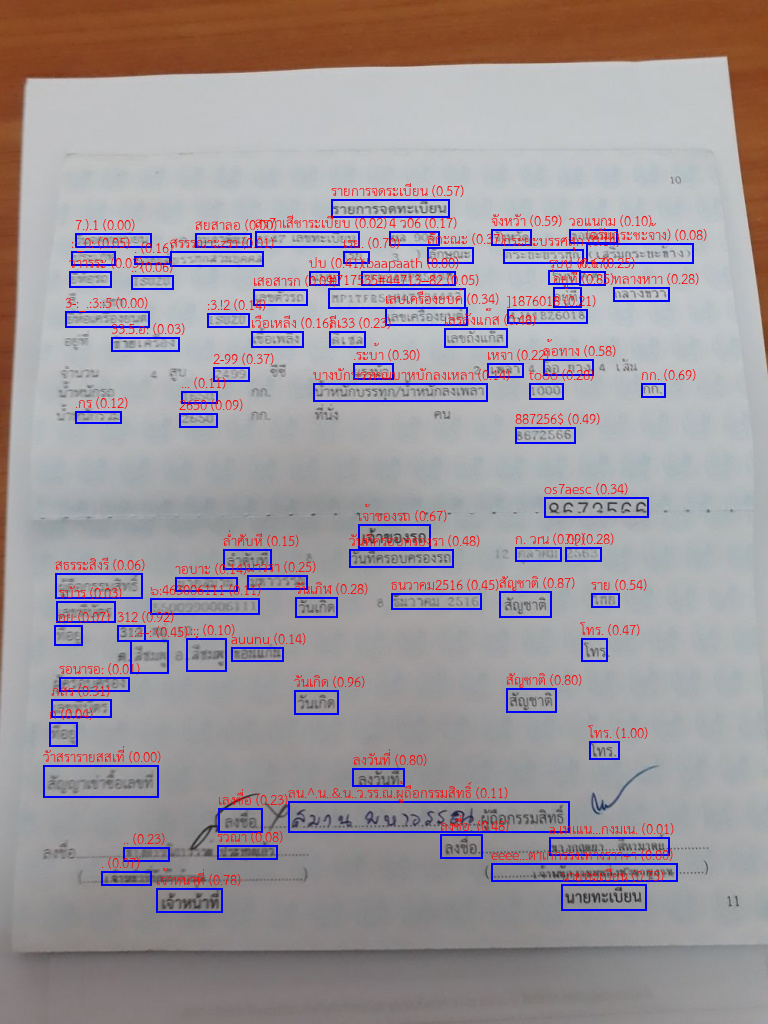

In [5]:
from PIL import ImageDraw, ImageFont

FONT = ImageFont.truetype("assets/THSarabun.ttf", size=20)

def draw_boxes(image: Image.Image, results: list[tuple[int, int, int, int], str, float]) -> None:
    """Draw bounding boxes and its information on the image."""
    # Create a drawing object
    draw = ImageDraw.Draw(image)

    # Draw each result on the image.
    for result in results:
        # Unpack the result.
        bbox, text, confidence_score = result

        # bbox is a four-point coordinate of the bounding box. [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
        # we need to convert it to PIL coordinates to draw the rectangle.
        # which is only two points, top-left and bottom-right. [x1, y1, x2, y2]

        pil_bbox = [bbox[0][0], bbox[0][1], bbox[2][0], bbox[2][1]]


        # 1. Draw the bounding box
        draw.rectangle(pil_bbox, outline='blue', width=2)
        # 2. Draw the text and confidence score e.g. 'Hello (0.72)'
        draw_text = f'{text} ({confidence_score:.2f})'

        # Place text at the top-left of the bounding box and shift it up by 20 pixels
        x = pil_bbox[0]
        y = pil_bbox[1] - 20
        draw.text((x, y), draw_text, fill='red', font=FONT)

# Create a copy of the image to draw on
image_with_boxes = image.copy()
draw_boxes(image_with_boxes, results)

display(image_with_boxes)

## Advanced

We can use `easyocr.Reader` to perform only text detection task by using the `detect` method. This allows us to use custom text recognition model rather than easyocr's default model.

In [6]:
from easyocr import Reader

# Initialize the EasyOCR reader
detector = Reader([])  # Don't need to specify any languages because we only need to detect the text regions

# Perform text detection
batch_regions, _ = detector.detect(image_path)

# Because we only inference single image, we only need the first result
regions = batch_regions[0]

/Users/nim/miniforge3/envs/skooldio/lib/python3.12/site-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(tor

In [7]:
# Print first result just to see the output
bbox = regions[0]

print(f'Bounding box: {bbox}')

Bounding box: [np.int32(331), np.int32(449), np.int32(199), np.int32(217)]


Now we can draw the bounding boxes.

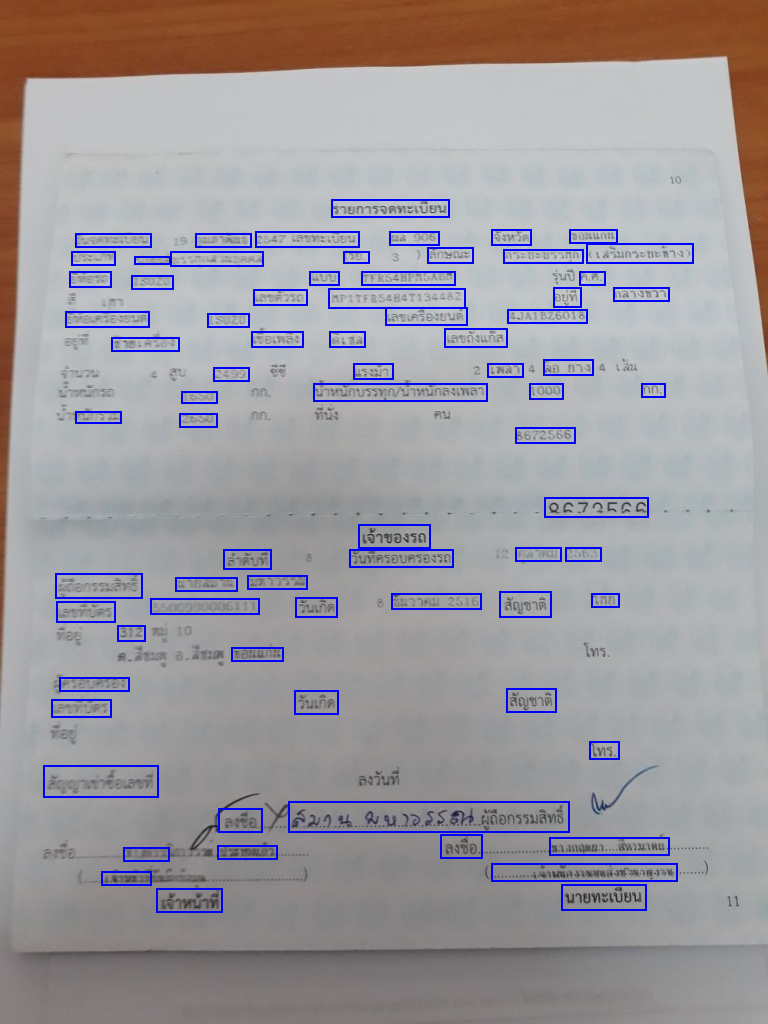

In [8]:
from PIL import ImageDraw

# Create a copy of the image to draw on
image_with_boxes = image.copy()

# Create a drawing object
draw = ImageDraw.Draw(image_with_boxes)

# Draw each region on the image
for region in regions:
    # Rearrange the region to match the PIL coordinate system
    region = [region[0], region[2], region[1], region[3]]
    draw.rectangle(region, outline='blue', width=2)

display(image_with_boxes)